In [ ]:
# Inatalación, es necesario correr esta celda, de lo contrario el código no funcionara.:
! pip install pyomo
! apt-get update
! apt-get install -y glpk-utils

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,696 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-

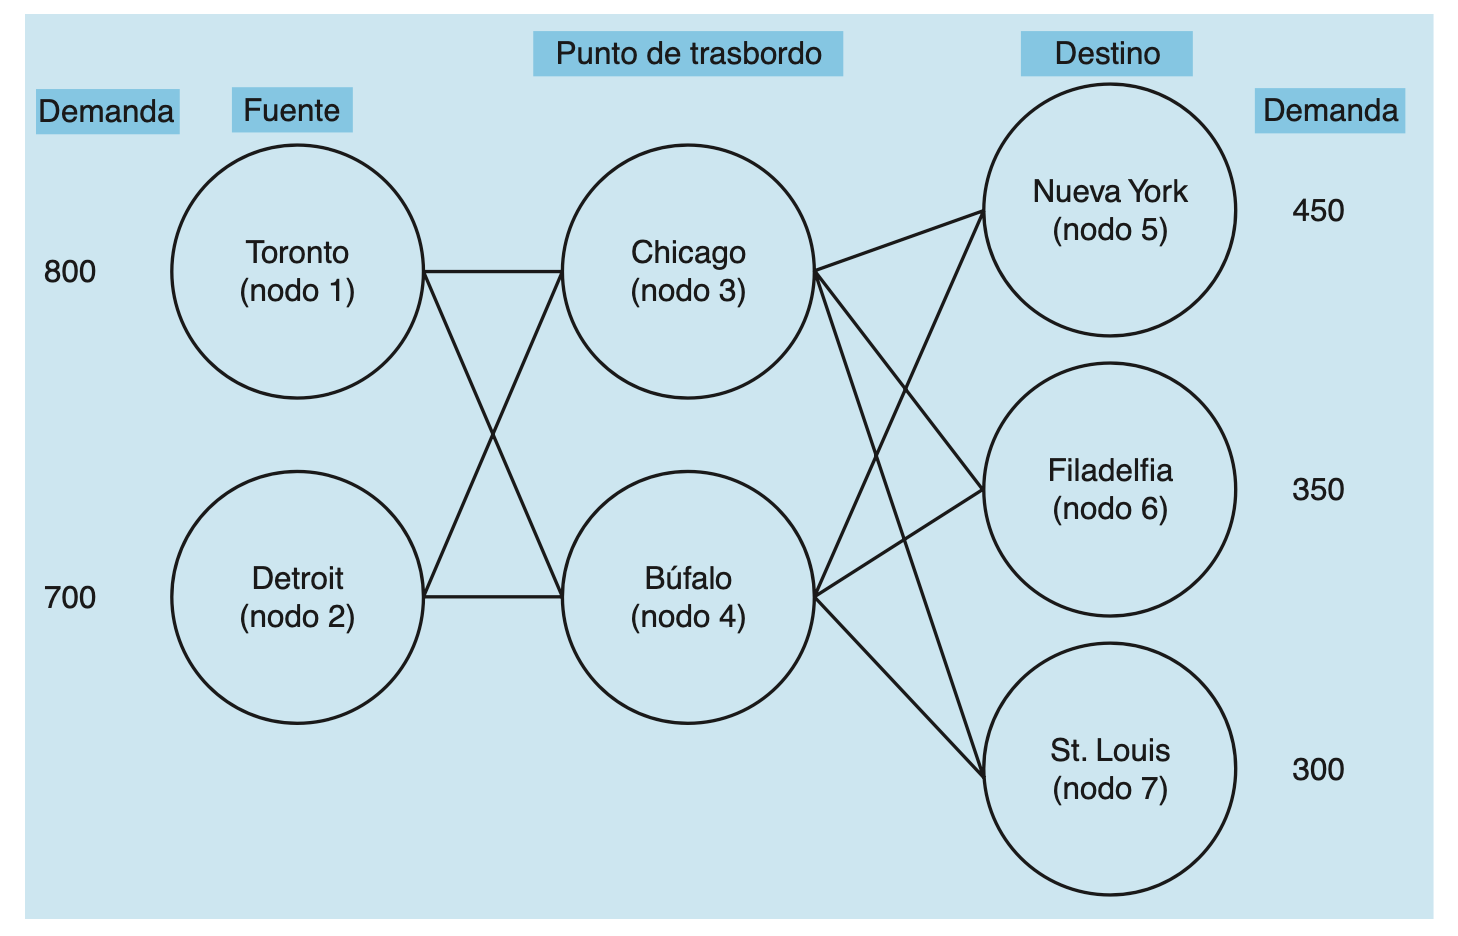

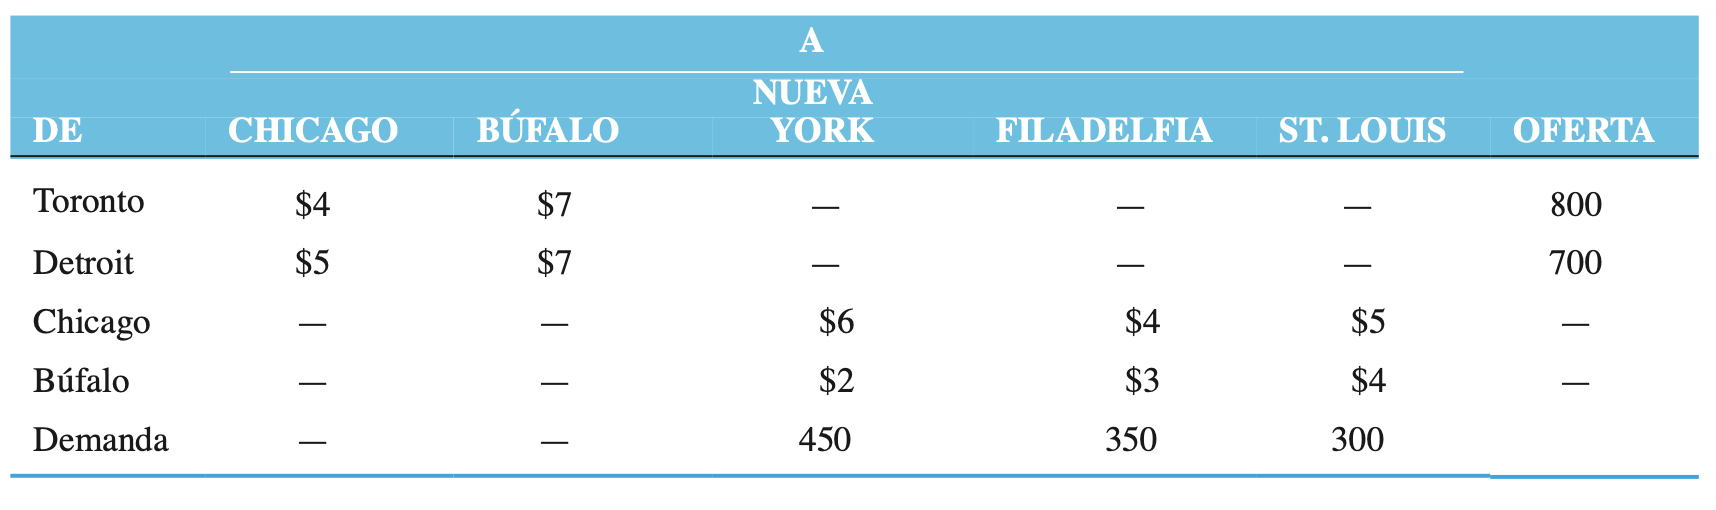

# Tarea
1. Crear función objetivo
2. Crear restricciones
3. Optimizar el modelo
4. Reportar resultados y dar conclusiones.

Complete el siguiente código.
Para completarlo, lea los comentarios del código, los cuales le dirán lo que tiene que completar.

In [ ]:
# Importamos las bibliotecas necesarias
from pyomo.environ import *

# Fuentes: 1 (Toronto), 2 (Detroit)
# Transbordos: 3 (Chicago), 4 (Buffalo)
# Destinos: 5 (Nueva York), 6 (Filadelfia), 7 (St. Louis)

# Creamos el modelo
model = ConcreteModel()

# Definimos las variables de decisión
model.x_13 = Var(within=NonNegativeReals) #
model.x_14 = Var(within=NonNegativeReals) #
model.x_23 = Var(within=NonNegativeReals) #

model.x_24 = Var(within=NonNegativeReals) #
model.x_35 = Var(within=NonNegativeReals) #
model.x_36 = Var(within=NonNegativeReals) #

model.x_37 = Var(within=NonNegativeReals) #
model.x_45 = Var(within=NonNegativeReals) #
model.x_46 = Var(within=NonNegativeReals) #
model.x_47 = Var(within=NonNegativeReals) #







In [ ]:
model.obj = Objective(expr= 4*model.x_13 + 7*model.x_14 + 5*model.x_23 + 7*model.x_24 + 6*model.x_35 + 4*model.x_36 + 5*model.x_37 + 2*model.x_45 + 3*model.x_46 + 4*model.x_47, sense= minimize)


In [ ]:

# Definimos las restricciones
# Completar restricciones
model.con1 = Constraint(expr= model.x_13 + model.x_14 <= 800) #
model.con2 = Constraint(expr= model.x_23 + model.x_24 <= 700) #
model.con3 = Constraint(expr= model.x_35 + model.x_45 == 450) #
model.con4 = Constraint(expr= model.x_36 + model.x_46 == 350) #
model.con5 = Constraint(expr= model.x_37 + model.x_47 == 300) #
model.con6 = Constraint(expr= model.x_13 + model.x_23 - (model.x_35 + model.x_36 + model.x_37 ) == 0) #
model.con7 = Constraint(expr= model.x_14 + model.x_24 - (model.x_45 + model.x_46 + model.x_47 ) == 0) #




In [ ]:


# Creamos un solver, por ejemplo GLPK
solver = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()# SolverFactory('glpk')



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 9550.0
  Upper bound: 9550.0
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 10
  Number of nonzeros: 20
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0038406848907470703
# ----------------------------------------------------------
#   Solution Information
# -------------------------------

In [ ]:

# # Resolvemos el problema
# solver.solve(model)

# Mostramos los resultados
print(f"Valor óptimo de x_13: {model.x_13()}")
print(f"Valor óptimo de x_14: {model.x_14()}")
print(f"Valor óptimo de x_23: {model.x_23()}")

print(f"Valor óptimo de x_24: {model.x_24()}")
print(f"Valor óptimo de x_35: {model.x_35()}")
print(f"Valor óptimo de x_36: {model.x_36()}")

print(f"Valor óptimo de x_37: {model.x_37()}")
print(f"Valor óptimo de x_45: {model.x_45()}")
print(f"Valor óptimo de x_46: {model.x_46()}")

print(f"Valor óptimo de x_47: {model.x_47()}")

print(f"Valor óptimo de Z: {model.obj()}")


Valor óptimo de x_13: 650.0
Valor óptimo de x_14: 0.0
Valor óptimo de x_23: 0.0
Valor óptimo de x_24: 450.0
Valor óptimo de x_35: 0.0
Valor óptimo de x_36: 350.0
Valor óptimo de x_37: 300.0
Valor óptimo de x_45: 450.0
Valor óptimo de x_46: 0.0
Valor óptimo de x_47: 0.0
Valor óptimo de Z: 9550.0


Dado el grafo, crea un modelo de transbordo para optimizarlo con Símplex, usando Python o Excel.
El resultado debe ser el siguiente:
 - Toronto a Chicago = 650
 - Toronto a Buffalo = 150
 - Chicago a Phil = 350
 - Chicago a St. Louis = 300
 - Buffalo a NYC = 450
 - Los demas son cero.
 - Costo total = 9550

Impreso de Python.
 - Valor óptimo de x_13: 650.0
 - Valor óptimo de x_14: 0.0
 - Valor óptimo de x_23: 0.0
 - Valor óptimo de x_24: 450.0
 - Valor óptimo de x_35: 0.0
 - Valor óptimo de x_36: 350.0
 - Valor óptimo de x_37: 300.0
 - Valor óptimo de x_45: 450.0
 - Valor óptimo de x_46: 0.0
 - Valor óptimo de x_47: 0.0
 - Valor óptimo de Z: 9550.0


En este ejemplo podemos observar como la demanda de los productos empieza o emana de dos fuentes que la ofertan hacia otros dos puntos de trasbordo, despues esos puntos de trasbordo se convierten en nuevas fuentes para su destino final optimizando los costos (minimizandolos) ($ 9550) Los optimos de productos demandados los podemos ver por la solucion del codigo y el texto de retroalimentacion (
# Fuentes: 1 (Toronto), 2 (Detroit)
# Transbordos: 3 (Chicago), 4 (Buffalo)
# Destinos: 5 (Nueva York), 6 (Filadelfia), 7 (St. Louis))
pero algo que me parece curioso fueron en dos restricciones del sistema puesto que fueron equivalentes a 0 (todo lo que ingresa sale)
 en este caso no ingreso todo lo ofertado que son 1500 sino solo se mandaron 1100 "productos" tal cual lo que se demanda intuitivamente parece razonable pero me tarde para comprenderlo y aplicarlo a restriccion o en forma matematica (ilacion del flujo).

 Oferta>Demanda